<font style="font-size:96px; font-weight:bolder; color:#0040a0"><img src="http://montage.ipac.caltech.edu/docs/M51_logo.png" alt="M" style="float: left; padding: 25px 30px 25px 0px;" /></font>

<i><b>Montage</b> Montage is an astronomical image toolkit with components for reprojection, background matching, coaddition and visualization of FITS files. It can be used as a set of command-line tools (Linux, OS X and Windows), C library calls (Linux and OS X) and as Python binary extension modules.

The Montage source is written in ANSI-C and code can be downloaded from GitHub ( https://github.com/Caltech-IPAC/Montage ). The Python package can be installed from PyPI ("pip install MontagePy"). The package has no external dependencies. See http://montage.ipac.caltech.edu/ for details on the design and applications of Montage.


# MontagePy.main modules: mAddCube

Most of Montage is focused on 2D astronomical image mosaics: reprojection, background matching, coaddition and so on.  But there is also a need for tools that operate on data "cubes": three- or four-dimensional arrays where two of the axes represent the same projected sky coordinates as we find in the 2D images.  Usually, the third axis is some form of wavelength.

The problem sets are not completely parallel: datacubes do not generally need background matching but you do frequently want cutouts in the none spatial dimensions and to transpose axes.

Montage includes a set of routines for manipulating datacubes:

<ul>
<li><b>mmProjectCube</b> &mdash; Reproject the spatial dimensions.</li>
<li><b>mAddCube</b> &mdash; Reproject the cube.</li>
<li><b>mShrinkCube</b> &mdash; Rescale a cube (integer scaling in the non-spatial dimensions).</li>
<li><b>mSubCube</b> &mdash;Cut a portion out of a cube.</li>
<li><b>mTranspose</b> &mdash; Transpose a cube's axes.</li>
</ul>

This routine, mAddCube, coadds a set of reprojected datacubes.  It is essentially a multi-dimensional analog to the routine mAdd and uses the same fractional pixel weighting logic (area coverage files primarily generated by the reprojection code). 

<b>Note:</b> The MontagePy python package has no external dependencies. We include other utilities on this page to aid in visualizing MontagePy package results.

In [1]:
from MontagePy.main import mAddCube, mViewer

help(mAddCube)

Help on built-in function mAddCube in module MontagePy.main:

mAddCube(...)
    mAddCube coadds as set of datacubes that have been reprojected to the same pixel framework into a final mosaic.
    
    Parameters
    ----------
    path : str
        Directory containing files to be coadded.
    tblfile : str
        Table file list of reprojected files to coadded.
    template_file : str
        FITS header file used to define the desired output.
    outfile : str
        Final mosaic FITS file.
    shrink : bool, optional
        Shrink-wrap to remove blank border areas.
    haveAreas : bool, optional
        Area files exist for weighting the coadd.
    coadd : int, optional
        Image stacking: 0(MEAN), 1(MEDIAN), 2(COUNT).
    debug : int, optional
        Debugging output level.
    
    
    Returns
    -------
    status : int
        Return status (0: OK, 1:ERROR).
    msg : str
        Return message (for errors).
    time : float
        Total processing time (sec).



## mAddCube Example

mAddCube is the tail end of the datacube mosaicking process.  At this point we have a set of reprojected cubes and have generated a metadata table listing them all.  The last step is to coadd them, properly weighting things like fractional pixels, to produce the final mosaic.

The basic inputs are the datacubes themselves (the path to them and the table of metadata), the header template for the output (which by now should match, except for integer pixel offsets, the headers in each cube), and the name of the desired output datacube file.

mAdd has a few extra controls that can be used to tell it whether to "shrink-wrap" the mosaic (remove empty border pixel areas) and whether the input images have associated "area" images (for proper weighting of fractional pixel coaddition).  In addition, the user has the option of overriding the default coaddition mode (mean) and instead return the median or just the count of the input pixels.

See previous steps in the process for details on the header template.

Datacubes are inherently substantially bigger than 2D images, so even our test example here will take 4-5 minutes to process.  Be patient.


In [2]:
rtn = mAddCube('GALFA/projected', 
               'GALFA/pimages.tbl', 
               'GALFA/galfa.hdr',
               'work/GALFA/GALFAmosaic.fits')
print(rtn)

{'status': '0', 'time': 159.0}


&nbsp;<p/>

Here is a one of the input images (or more exactly a few wavelengths from one of the images averaged):

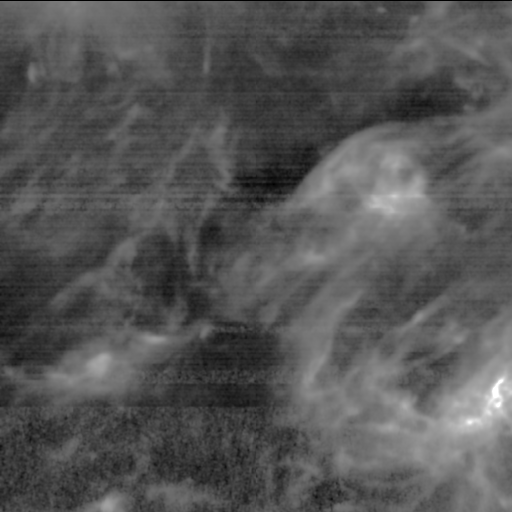

In [3]:
from IPython.display import Image

mViewer('-ct 0 -gray "GALFA/shrunken/GALFA_HI_RA+DEC_004.00+26.35_N.fits[0][60:64]" \
         -2s max gaussian-log -out work/GALFA/GALFA_HI_RA+DEC_004.00+26.35_N.png', 
        '', mode=2)

Image(filename='work/GALFA/GALFA_HI_RA+DEC_004.00+26.35_N.png')

&nbsp;<p/>

And here is the complete mosaic (same wavelengths and with an overlay of the original image outlines):

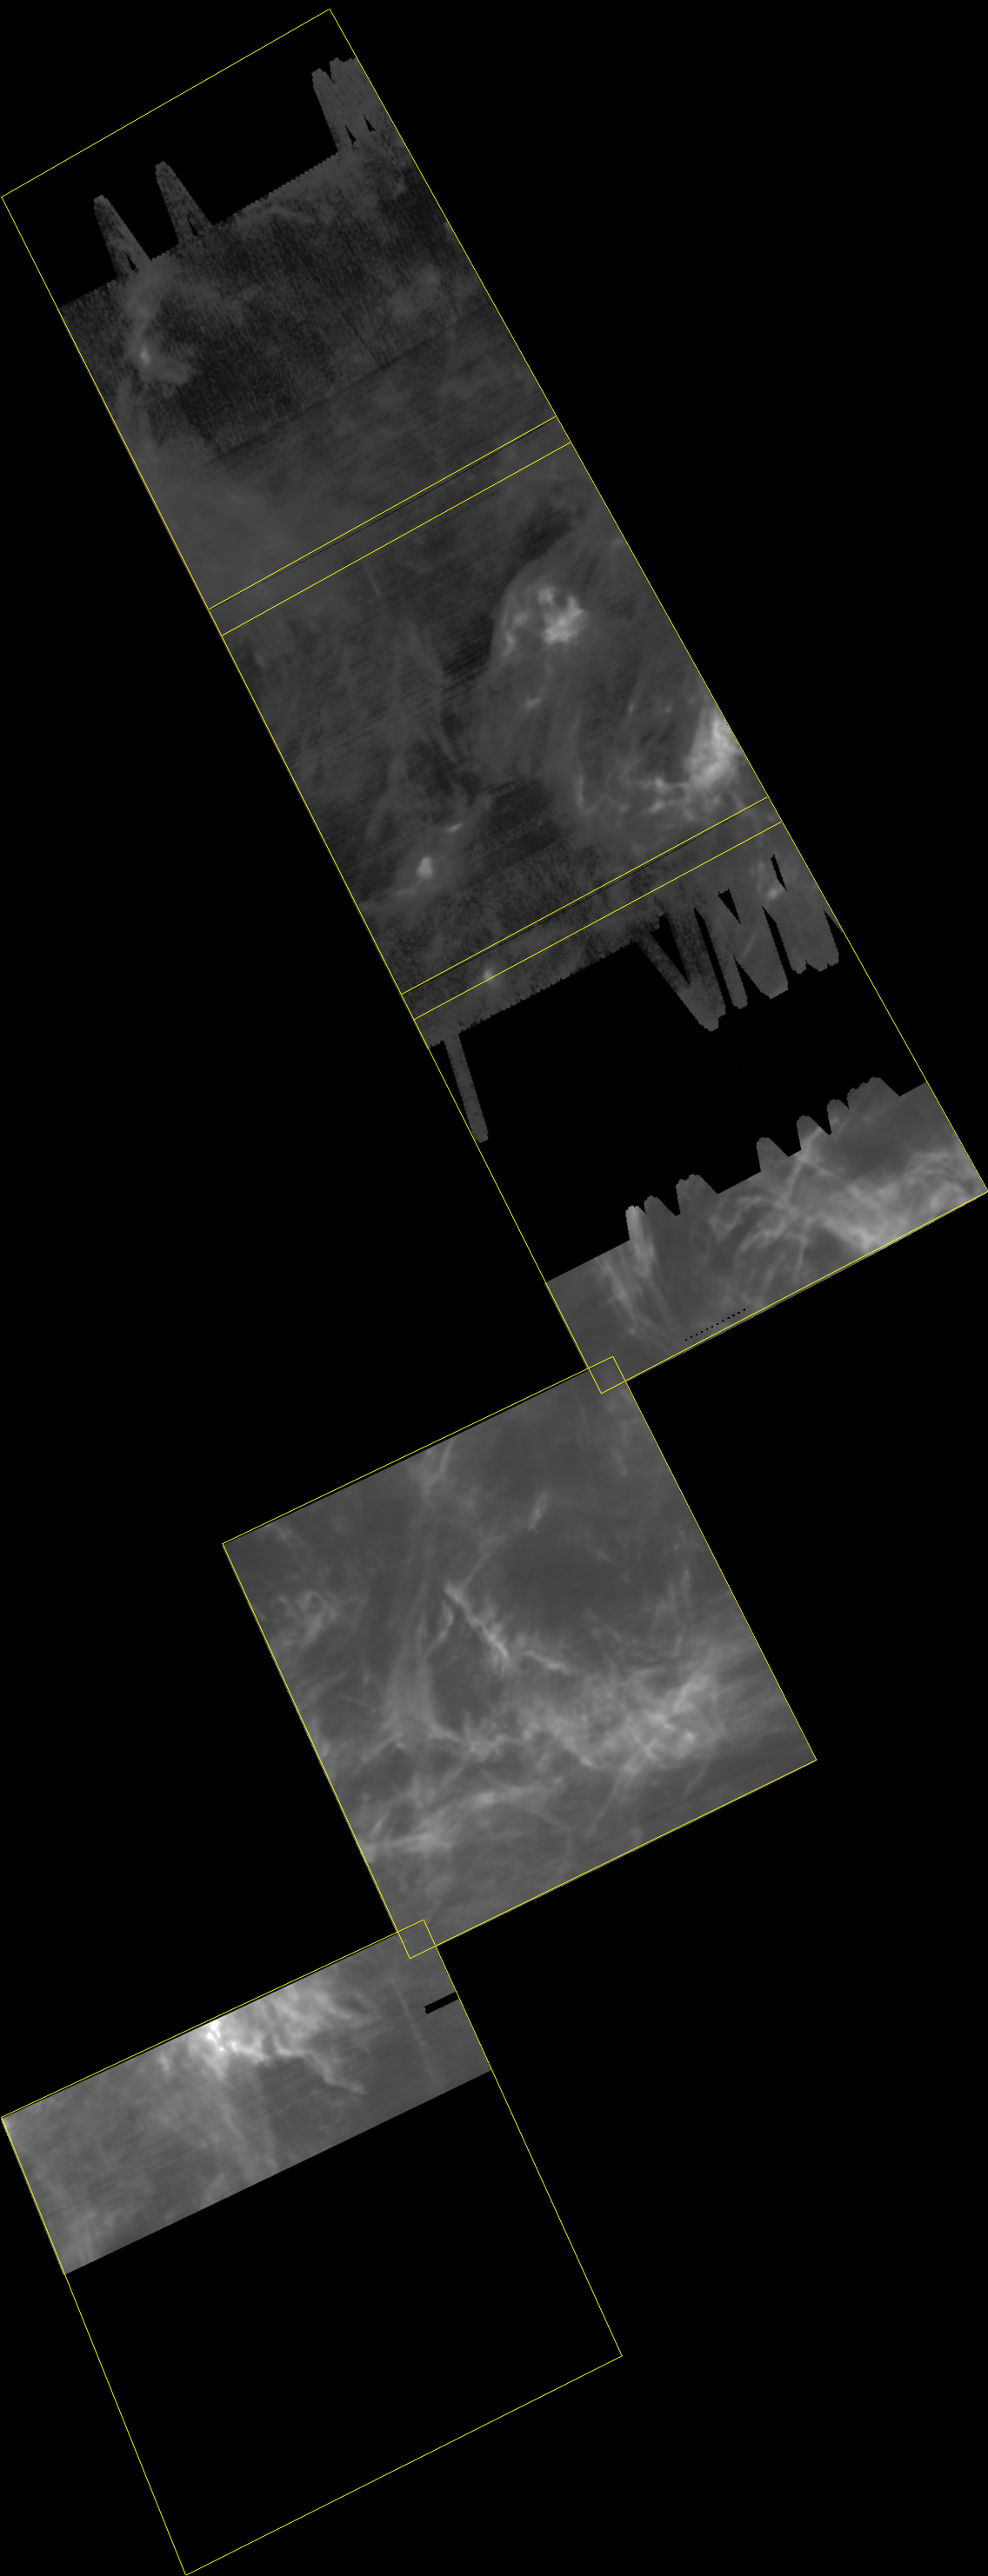

In [4]:
mViewer('-color yellow -imginfo GALFA/simages.tbl \
         -ct 0 -gray "work/GALFA/GALFAmosaic.fits[0][60:64]" \
         -2s max gaussian-log -out work/GALFA/GALFAmosaic.png', 
        '', mode=2 )

Image(filename='work/GALFA/GALFAmosaic.png')

## mAddCube Error Handling

If mAddCube encounters an error, the return structure will just have two elements: a status of 1 ("error") and a message string that tries to diagnose the reason for the error.

For instance, if the user asks for a table that does not exist:

In [5]:
rtn = mAddCube('GALFA/projected', 
               'GALFA/unknown.tbl', 
               'GALFA/galfa.hdr',
               'work/GALFA/GALFAmosaic.fits')
print(rtn)

{'status': '1', 'msg': b'Invalid or missing image metadata file: GALFA/unknown.tbl'}


&nbsp;

## Classic Montage: mAddCube as a Stand-Alone Program

### mAddCube Unix/Windows Command-line Arguments

<p>mAddCube can also be run as a command-line tool in Linux, OS X, and Windows:</p>

<p><tt>
<b>Usage:</b> mAddCube [-p imgdir] [-n(o-areas)] [-a mean|median|count] [-e(xact-size)] [-d level] [-s statusfile] images.tbl template.hdr out.fits
</tt></p>
<p>&nbsp;</p>
<p>If you are writing in C/C++, mAddCube can be accessed as a library function:</p>


<pre>
/*-***********************************************************************/
/*                                                                       */
/*  mAddCube                                                             */
/*                                                                       */
/*  Montage is a set of general reprojection / coordinate-transform /    */
/*  mosaicking programs.  Any number of input images can be merged into  */
/*  an output FITS file.  The attributes of the input are read from the  */
/*  input files; the attributes of the output are read a combination of  */
/*  the command line and a FITS header template file.                    */
/*                                                                       */
/*  This module, mCubeAdd, reads sets of flux / area coverage datacubes  */
/*  (the output of mCubeProj) which have already been projected /        */
/*  resampled onto the same pixel space.  The fluxs, scaled by total     */
/*  input area, are then coadded into a single output composite.         */
/*                                                                       */
/*   char  *path           Directory containing files to be coadded      */
/*   char  *tblfile        Table file list of reprojected files to       */
/*                         coadd                                         */
/*   char  *template_file  FITS header file used to define the desired   */
/*                         output                                        */
/*   char  *outfile        Final mosaic FITS file                        */
/*                                                                       */
/*   int    shrink         Shrink-wrap to remove blank border areas      */
/*   int    haveAreas      Area files exist for weighting the coadd      */
/*   int    coadd          Image stacking: 0 (MEAN), 1 (MEDIAN)          */
/*                         2 (COUNT)                                     */
/*                                                                       */
/*   int    debug          Debugging output level                        */
/*                                                                       */
/*************************************************************************/


struct mAddCubeReturn *mAddCube(char *path, char *tblfile, char *template_file, char *outfile,
                                int shrink, int haveAreas, int coadd, int debugin)
</pre>
<p><b>Return Structure</b></p>
<pre>
struct mAddCubeReturn
{
   int    status;        // Return status (0: OK, 1:ERROR)
   char   msg [1024];    // Return message (for error return)
   char   json[4096];    // Return parameters as JSON string
   double time;          // Run time (sec)   
};
</pre>